In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

2023-03-11 15:03:36.043691: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

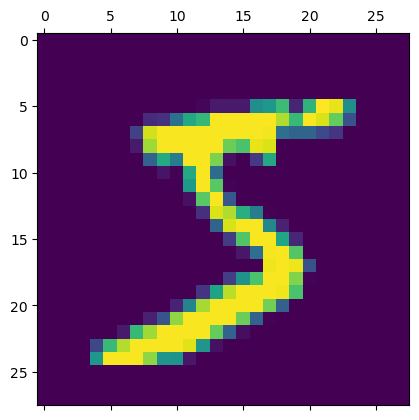

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
# Normalization

X_train = X_train /255
X_test = X_test / 255

In [11]:
# from  28x28 create one-dementional vector. First we put len(X_train) to save 60k rows, then 28*28 to make 784 columns

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


### Here I'm creating a simple NN without any hidden layers: just input and output

In [14]:
#10 - number of output neurons

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 1s 442us/step - loss: 0.4647 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 1s 460us/step - loss: 0.3035 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 1s 496us/step - loss: 0.2834 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 1s 438us/step - loss: 0.2731 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 1s 438us/step - loss: 0.2666 - accuracy: 0.9253


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 390us/step - loss: 0.2680 - accuracy: 0.9256


[0.2680245339870453, 0.925599992275238]

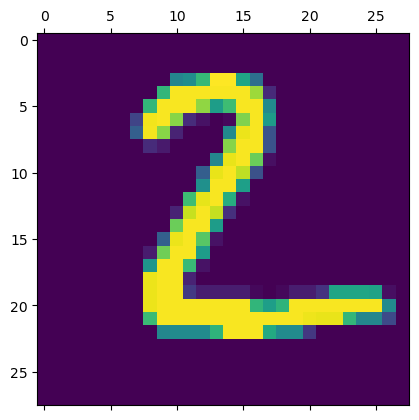

In [16]:
plt.matshow(X_test[1])

In [17]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 0s 343us/step


array([2.0971586e-01, 5.0765001e-03, 9.9940026e-01, 2.7365309e-01,
       5.8863109e-10, 8.3420295e-01, 8.8639766e-01, 3.6098346e-13,
       1.1705431e-01, 2.4991438e-09], dtype=float32)

In [20]:
#prints index of maximum value

np.argmax(y_predicted[1])

2

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(f"{y_predicted_labels[:10]} vs.\n{y_test[:10]}")

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9] vs.
[7 2 1 0 4 1 4 9 5 9]


In [22]:
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    4,    2,    0,    6,    8,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   4,    9,  935,   14,    9,    3,   12,    8,   34,    4],
       [   2,    0,   23,  926,    1,   21,    2,    7,   18,   10],
       [   1,    1,    6,    2,  917,    0,    9,    3,    9,   34],
       [   8,    3,    3,   43,   11,  768,   18,    3,   27,    8],
       [   8,    3,    8,    1,    7,   10,  918,    2,    1,    0],
       [   1,    9,   28,    9,    9,    0,    0,  926,    2,   44],
       [   6,    8,    8,   24,    9,   27,   10,    6,  868,    8],
       [  10,    7,    2,   11,   29,    7,    0,   11,    5,  927]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'Truth')

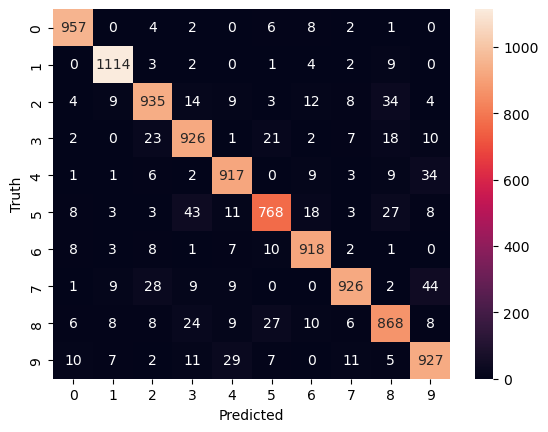

In [24]:
# values on a diagonal row of the heatmap mean how many times the value was predicted correctly 
# 0 was predicted correctly 963 times, 1 - 1109
# other values mean how many times was a mistake done: real 2 was 40 times predicted to be 8, 
# and 0 was never predicted to be 1

plt.figure()
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel ('Predicted')
plt.ylabel ('Truth')

## Adding a hidden layer to the model

In [25]:
model_with_hidden = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'), #this is a hidder layer
    keras.layers.Dense(10, activation = 'sigmoid')

])

model_with_hidden.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy'])

model_with_hidden.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 760us/step - loss: 0.2704 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 1s 751us/step - loss: 0.1242 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 1s 751us/step - loss: 0.0863 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 1s 759us/step - loss: 0.0673 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 1s 756us/step - loss: 0.0519 - accuracy: 0.9840


In [26]:
model_with_hidden.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 498us/step - loss: 0.0785 - accuracy: 0.9759


[0.07846532016992569, 0.9758999943733215]

313/313 [==============================] - 0s 426us/step


Text(50.722222222222214, 0.5, 'Truth')

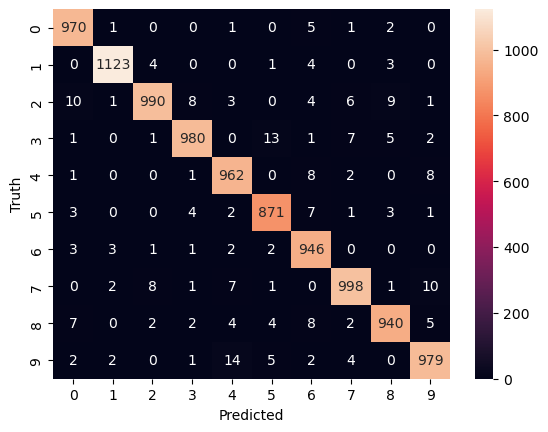

In [28]:
y_predicted_hidden = model_with_hidden.predict(X_test_flattened)
y_predicted_hidden_labels = [np.argmax(i) for i in y_predicted_hidden]
cm_hidden = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_hidden_labels)

plt.figure()
sns.heatmap(cm_hidden, annot = True, fmt = 'd')
plt.xlabel ('Predicted')
plt.ylabel ('Truth')

 ### No flattening as a precondition to trainig

In [29]:
model_flatten = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), #flattening is executed here
    keras.layers.Dense(100, activation = 'relu'), #this is a hidder layer
    keras.layers.Dense(10, activation = 'sigmoid')

])

tb_callbacks = tf.keras.callbacks.TensorBoard(log_dir = "logs/sgd", histogram_freq = 1)

model_flatten.compile(optimizer = 'SGD', 
                      loss = 'sparse_categorical_crossentropy', 
                      metrics = ['accuracy'])

model_flatten.fit(X_train, y_train, epochs = 5, callbacks = [tb_callbacks]) # X_train instead of X_train_flattened 

Epoch 1/5
1875/1875 [==============================] - 1s 678us/step - loss: 0.6723 - accuracy: 0.8292
Epoch 2/5
1875/1875 [==============================] - 1s 652us/step - loss: 0.3455 - accuracy: 0.9037
Epoch 3/5
1875/1875 [==============================] - 1s 694us/step - loss: 0.2977 - accuracy: 0.9161
Epoch 4/5
1875/1875 [==============================] - 1s 669us/step - loss: 0.2681 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 1s 644us/step - loss: 0.2451 - accuracy: 0.9302


In [30]:
model_flatten.evaluate(X_test, y_test)

313/313 [==============================] - 0s 489us/step - loss: 0.2280 - accuracy: 0.9341


[0.22799919545650482, 0.9340999722480774]

In [31]:
# tensorboard --logdir logs/   run it in the terminal from the folder, where the code file is. 
# Then copy localhost path to browser to analyse tensorboard

## CNN

In [32]:
def plot_sample(x, index):
    plt.figure(figsize = (1,1))
    plt.imshow(x[index])

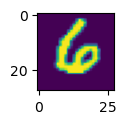

In [33]:
plot_sample(X_train, 221)

In [34]:
cnn = models.Sequential([
    
    #cnn
    layers.Conv2D(filters = 10, 
                  kernel_size = (2,2), 
                  activation = 'relu', 
                  input_shape = (28, 28,1)),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Conv2D(filters = 56,  
                  kernel_size = (2,2),
                  activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(), 
    layers.Dense(56, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])


In [35]:
cnn.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [36]:
cnn.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1815 - accuracy: 0.9448
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0664 - accuracy: 0.9794
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0483 - accuracy: 0.9850
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0369 - accuracy: 0.9887
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0297 - accuracy: 0.9906


In [37]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0405 - accuracy: 0.9886


[0.04047319293022156, 0.9886000156402588]

In [38]:
y_pred_cnn = cnn.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [39]:
y_pred_cnn[0]

array([1.5149102e-09, 4.6348470e-07, 3.6327313e-06, 3.9852875e-06,
       6.0652129e-11, 2.5373321e-08, 1.9252877e-13, 9.9996305e-01,
       3.3080433e-08, 2.8956985e-05], dtype=float32)

In [40]:
np.argmax(y_pred_cnn[0])

7

In [41]:
y_test[0]

7

In [42]:
y_pred_cnn_classes = [np.argmax(element) for element in y_pred_cnn]

In [43]:
y_pred_cnn_classes[0]

7

In [44]:
print(y_test[0:10])
print(y_pred_cnn_classes[0:10])

[7 2 1 0 4 1 4 9 5 9]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [45]:
from sklearn.metrics import classification_report
print(f'Classification report: \n{classification_report(y_test, y_pred_cnn_classes)}')

Classification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

